## Homework 1: Linear methods

максимально возможный балл: 15

### Теоретические задачи

#### **Задание 1: воспоминания из ML (1.5 балла)**

Напишите короткий ответ на следующие вопросы:

__1) Для чего помимо обучающей и тестовой выборок выделяют валидационную? Как это связано с переобучением?__

_Это делают для того, чтобы после обучения модели проверить ее как раз на этих валидационных данных. Так как для них мы знаем верный ответ, то, выделяя такую выборку, мы оцениваем, насколько модель действительно выявила паттерн. Если значение функции потерь маленькое, то это означает, что модель выявила паттерн. Иначе модель просто переобучилась на обучающей выборке._

__2) Допустим вы хотите обучить нейронную сеть следующей конфигурации:__
- полносвязный слой $n \times n$
- ReLU
- полносвязный слой $n \times n$
- ReLU
- полносвязный слой $n \times 10$
- softmax

__Сколько параметров содержит ваша нейронная сеть? Во сколько раз уменьшится это число, если вы сократите входную размерность вдвое?__

_Так как первый слой полносвязный, то у него будет n^2 + n параметров. Также для второго полносвязного слоя. В последнем полносвязном слое будет 10n + 10 параметров. Значит всего будет 2n^2 + 12n + 10 параметров. Соответственно, если n сократить вдвое, то количество параметров сократится примерно в 4 раза_

__3) Зачем нужен препроцессинг? Какие методы препроцессинга вы знаете? Назовите метод препроцессинга, который имеет смысл выполнить перед применением Ridge или Lasso, но нет смысла делать перед применением градиентного бустинга над решающими деревьями (xgboost, lightgbm, catboost).__

_Препроцессинг нужен для того, чтобы избавиться от различных проблем, связанных с данными. Например, чтобы избавиться от выбросов в выборке или чтобы нормализовать выборку, чтобы таким образом каждая переменная имела характеристики нормального распределения, для многих методов машинного обучения, например, PCA, эта процедура необходима. Или, например, кодирование категориальных признаков -- тоже пример препроцессинга, который необходим для ряда методов машинного обучения, которые не способны работать с категориальными методами._

_Для различного вида регуляризаций имеет смысл применять стандартизацию и другие монотонные преобразования(логарифмирование, бокс-кокс), когда как для деревьев это не так важно -- это изменит лишь пороги. Также удаление скореллированых переменных важно делать в стандартных методах регрессии, когда как для деревьев это не играет никакой роли. Более того, например, для катбуста даже не надо делать кодирование категориальных величин, что делать просто необходимо для всех остальных методов._

#### **Задача 2. Немного линейной алгебры (2 балла)**

Докажите следующие утверждения

1) __Если матрица $A$ является симметричной и положительно определенной, то найдется такая матрица $B$, что $A = BB^\top$. Существование базиса из собственных векторов считайте известным__

_Так как существует базис из собственных векторов, то в таком базисе матрица имеет диагональный вид, причем на диагонали стоят собственные числа, т.е. если $U$ -- матрица перехода от одного базиса, то_


$$ UAU^\top = diag(\lambda_1, ..., \lambda_n) $$

_То есть_ 

$$ A = U^\top diag(\lambda_1, ..., \lambda_n) U $$

_Пусть $\sqrt{D} = diag(\sqrt\lambda_1, ..., \sqrt\lambda_n)$, тогда_

$$ A = U^\top \sqrt{D}^\top \sqrt{D} U $$

_Тогда пусть $B = U^\top \sqrt{D}^\top $, тогда_

$$ A = B B^\top. $$

2) __Норма Фробениуса матрицы задается так:__

 $$\|A\|_F^2 = \sum\limits_{i,j} |a_{ij}|^2 = tr(A^\top A)$$

 __Докажите, что она не меняется при домножении на ортогональную матрицу__
 
 _Пусть $U$ -- ортогональная матрица. Домножим, например, справа, тогда_
 
$$\|AU\|_F^2 = tr(U^\top A^\top AU) = tr(UU^\top A^\top A) = tr(A^\top A)$$
 

 3)  __Докажите, что для диагонализуемых матриц (найдется базис, в котором матрица диагональна) норма Фробениуса равна сумме квадратов собственных значений.__

_Пусть $A$ диагонализуема, тогда сущ. такая ортогональная матрица $U$ -- матрица перехода -- что $ UAU^\top = D $, где $D$ -- диагональная матрица. Более того, матрица $U$ состоит собственных векторов, а $D = diag(\lambda_1, ..., \lambda_n)$, где $\lambda_i$ -- i-ое собственное число. Значит $A = U^\top D U $, тогда_

$$\|AU\|_F^2 = tr(A^\top A) = tr((U^\top D U)^\top U^\top D U) = tr(U^\top D^\top U U^\top D U) = tr(U^\top D^\top D U) = tr(UU^\top D^\top D) = tr(D^\top D) = \sum\limits_{i} |\lambda_{i}|^2 $$

 4) __Докажите, что невырожденные матрицы всюду плотны в множестве всех матриц по норме Фробениуса, т.е. для любой матрицы $A$ и $\varepsilon > 0$ найдется невырожденная матрица $B$, такая что $\|A- B\|_F < \varepsilon$__
 
 _Пусть_ $A$ _-- вырожденная матрица,_ $B$ _-- невырожденная. Значит_ $det A = 0 \neq det B$. Т_огда рассмотрим такой полином_ $p(t) = det((1-t)A + tB)$. _Он не нулевой, а значит существует конечное число таких_ $t_i$, _что_ $p(t_i) = 0$. _Тогда пусть_ $\forall i t \neq t_i$, _тогда матрица_ $C_t = (1-t)A + tB$ _обратима, значит_ $\|A - C_t\|_F^2 = \|t(A+B)\|_F^2 = \|t\| \|A+B\|_F^2 \geq \varepsilon$ _для_ $\|t\| = \frac{\varepsilon}{\|A+B\|_F^2}$.
 
 _Другими словами: множество невырожденных матриц -- это подмногообразие коразмерности 1. Тогда она имеет меру 0. Тогда его дополнение, множество обратимых матриц, всюду плотно_

#### **Задача 3: последнее воплощение PCA (4 балла)**

Докажите, что именно преобразование, задаваемое PCA, реализует минимизацию следующего функционала

$$ \sum\limits_{i < j} (\|x_i - x_j\|^2 - \|f(x_i) - f(x_j)\|^2)^2 \to \min$$

на множестве линейных функций f

_Заметим, что выражение можно записать в следующем виде:_

$$ (D^X - D^{f(X)})^2 \to \min,$$

_где матрицы $D$ -- матрицы попарных расстояний. Тогда чтобы достичь минимума, нужно, чтобы $D^{f(X)}$ была как можно ближе к $D^X$. Разложим $D$ в SVD, тогда $D = USV^\top$, значит нужно $D^{f(X)} = DV[:L]$, где L -- число первых наибольших сингулярных значений. Также можно сделать из матрицы $D$ симм. положит. опред. матрицу, например превратить ее в матрицу Грама, тогда можно воспользоваться разложением в базис из собственных векторов. Если также разложить и вторую матрицу, то оптимизационную задачу можно переписать в виде_

$$ Tr(V\Lambda V^\top - Q\hat\Lambda Q^\top)^2 \to \min$$

_Пусть_ $G = V^\top Q$, _тогда задача записывается в виде_

$$ Tr(\Lambda - G\hat\Lambda G^\top)^2 \to \min$$

_Наложив ограничение, чтобы_ $G = V^\top Q = I$, _получим, что_:

$$ Tr(\Lambda - \hat\Lambda)^2 \to \min$$

_А тогда надо положить_ $\hat\Lambda = \Lambda[:L]$, _более того, $V = Q$, из условия выше._

### Практические задачи

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image

iris = datasets.load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target

#### **Задача 4: PCA своими руками (2 балла)**

Реализуйте PCA. Из встроенных функций разрешается использовать только матричные разложения типа SVD, Холецкого и т.п.

In [2]:
class MyPCA(object):
    def __init__(self, dim=None):
        self.dim = dim
        self.A = None
        self.ratio = None
        self.principals = None
        self.u = None
        self.s = None

        
    def fit(self, X, verbose=False, eigen=False):
        if not eigen:
            return self.__fit_svd(X, verbose=verbose)
        covX = np.cov(X.T)
        eival, eivec = np.linalg.eig(covX)
        self.principals = eivec
        total_var = np.sum(eival)
        self.ratio = eival / total_var
        if self.dim is None:
            self.dim = self.__set_dim()
        self.A = self.principals[:,:self.dim]
        if verbose:
            print("Eigenvalues:{}\nEigenvectors:\n{}\nPCA matrix:\n{}\n".format(eival, eivec, self.A))
            print("Explained variance:")
            for i in range(len(eival)):
                print("{}th eigenvector explains {} of variance".format(i+1, eival[i]/total_var), "\t")
        return self.ratio
              
        
    def __fit_svd(self, X, verbose=False):
        u, s, vh = np.linalg.svd(X)
        self.principals = vh.T
        self.u = u
        self.s = s
        eival = s**2 / (X.shape[0]-1)
        total_var = np.sum(eival)
        self.ratio = eival / total_var
        if self.dim is None:
            self.dim = self.__set_dim()
        self.A = self.principals[:,:self.dim]
        if verbose:
            print("Singular Values:{}\nV^T:\n{}\nPCA matrix:\n{}\n".format(s, vh, self.A))
        return self.ratio
        
        
    def transform(self, X, verbose=False):
        if self.A is None:
            raise ValueError("You need to fit the data first!")
        if verbose:
            print("Shapes:\nX shape = {}\nA shape = {}".format(X.shape, self.A.shape))
        return np.matmul(X, self.A)
            

    def fit_transform(self, X, *args):
        ratio = self.fit(X, *args)
        return ratio, self.transform(X, *args)

    
    def inverse_transform(self, X):
        return np.matmul(X, np.linalg.pinv(self.A))
        
        
    def getA(self):
        return self.A

    
    def __set_dim(self, dim=None):
        if dim is None:
            for i in range(1,len(self.ratio)):
                if np.sum(self.ratio[:i]) > 0.9:
                    return i
        else:
            self.dim = dim
    
    
    def set_dim(self, dim=2):
        self.A = self.principals[:,:dim]

Убедитесь, что ваш класс выдает тот же ответ, что и pca, реализованный в sklearn

In [3]:
mypca = MyPCA()
mypca.fit(X, verbose=True)
my = mypca.transform(X)
my.shape

Singular Values:[20.92306556 11.7091661   4.69185798  1.76273239]
V^T:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
PCA matrix:
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]



(150, 2)

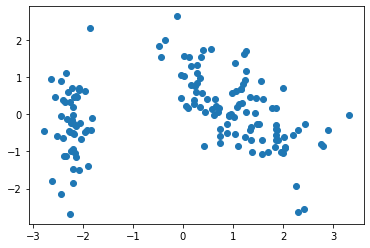

In [4]:
plt.scatter(my[:,0], my[:,1])

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
sk = pca.transform(X)
sk.shape

(150, 2)

In [6]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

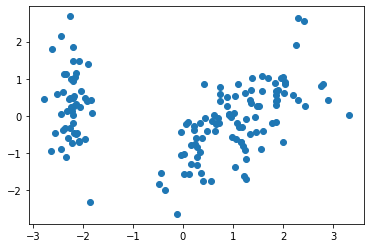

In [7]:
plt.scatter(sk[:,0], sk[:,1])

In [8]:
np.allclose(np.abs(sk), np.abs(my))

True

#### **Задача 5: Сжатие картинок (2 балла)**

Загрузите приложенные картинки (city, trees, person). Попробуйте сжать их при помощи PCA и восстановить при разных параметрах. Отрисуйте получившиеся картинки. При какой размерности качество начинает существенно снижаться? Одинакова ли эта крайняя размерность у разных картинок? Если нет, то почему?

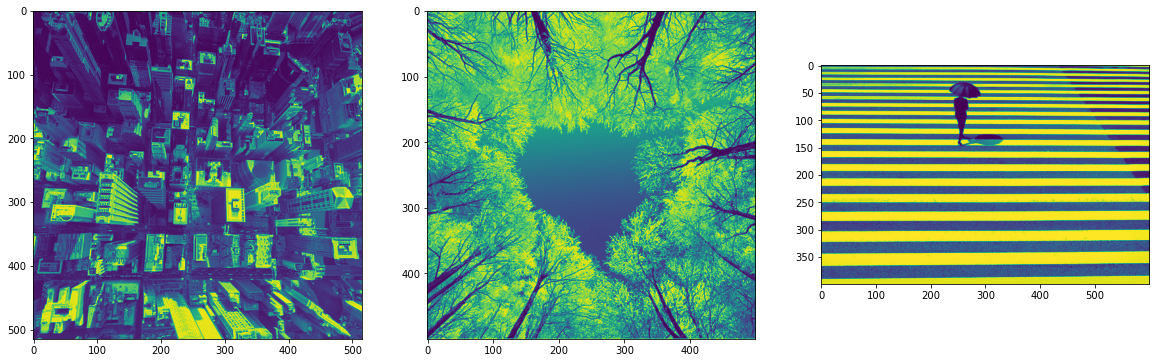

In [9]:
city = plt.imread('data/city.jpg')
city = city[:,:,0].reshape((*city.shape[:-1],1))
trees = plt.imread('data/trees.jpg')
trees = trees[:,:,0].reshape((*trees.shape[:-1],1))
person = plt.imread('data/person.jpg')
person = person.reshape((*person.shape, 1))
data = [city, trees, person]
fig, ax = plt.subplots(1, 3, figsize=(20,20))
for i in range(len(ax)):
    ax[i].imshow(data[i])

In [10]:
def ratio_plot(ratio, title=None):
    n = ratio.shape[0]
    plt.plot(range(n), ratio)
    plt.title = title
    if title is not None:
        plt.savefig('city/ratio.png')
        

def compute_compressed(pca, X_scaled, rng, sc):
    res = np.zeros((*X_scaled.shape, rng))
    for i in range(rng):
        pca.set_dim(i)
        res[:, :, i] = sc.inverse_transform(pca.inverse_transform(pca.transform(X)))
    return res
        
        
def change_dim(X, fname=None):
    num_dim = X.shape[0]
    ch_arrs = np.zeros((*X.shape, num_dim))
    print(ch_arrs.shape)
    channels = X.shape[-1]
    for i in range(channels):
        sc = StandardScaler()
        X_scaled = sc.fit_transform(X[:,:, i])
        reduct = MyPCA()
        ratio = reduct.fit(X_scaled)
        ch_arrs[:,:,i,:] = compute_compressed(reduct, X_scaled, num_dim, sc)
    images = [None] * num_dim
    for i in range(num_dim):
        images[i] = Image.fromarray(ch_arrs[:,:,0,i]) if channels == 1 else Image.fromarray(ch_arrs[:,:,:,i].astype(np.uint8))
    frame_one = images[0]
    frame_one.save(fname, format="GIF", append_images=images,
               save_all=True, duration=100, loop=0)

City

(515, 515)


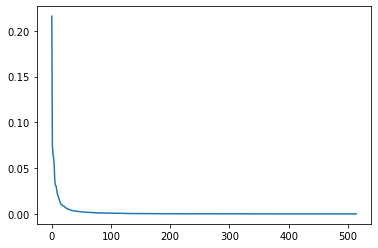

In [11]:
X = StandardScaler().fit_transform(city[:,:,0])
print(X.shape)
#plt.imshow(X)
city_pca = MyPCA()
ratio, city_trans = city_pca.fit_transform(X, False)
plt.plot(range(X.shape[0]), ratio)
plt.show()

In [12]:
change_dim(city, "city.gif")

(515, 515, 1, 515)


KeyboardInterrupt: 

![city](city.gif)

Trees

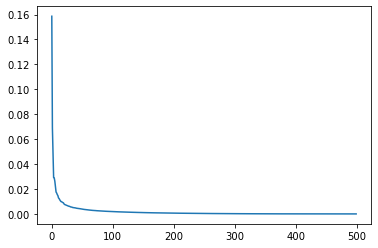

In [13]:
X = StandardScaler().fit_transform(trees[:,:,0])
tree_pca = MyPCA()
ratio, tree_trans = tree_pca.fit_transform(X, False)
plt.plot(range(X.shape[0]), ratio)
plt.show()

In [ ]:
change_dim(trees, "trees.gif")

![trees](trees.gif "trees")

Person

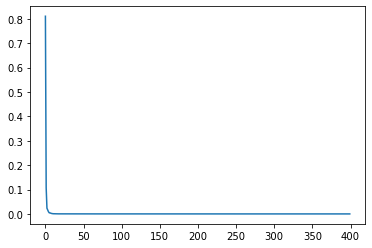

In [14]:
X = StandardScaler().fit_transform(person[:,:,0])
person_pca = MyPCA()
ratio, person_trans = person_pca.fit_transform(X, False)
plt.plot(range(X.shape[0]), ratio)
plt.show()

In [ ]:
change_dim(person, "person.gif")

![person](person.gif)

#### **Задача 6: Сжатие картинок - 2 (3.5 балла)**

Возьмите любую картинку (можно взять одну из предыдующей задачи). Подберите оптимальную размерность сжатия при помощи стандартных методов (например, Кайзер, сломанная трость и число обусловленности [отсюда](https://ru.wikipedia.org/wiki/Метод_главных_компонент)). Нарисуйте график сохраненной дисперсии в зависимости от размерности и отметьте на ней полученные результаты. А какую размерность вы считаете оптимальной? Нарисуйте картинки

(128, 128, 3)


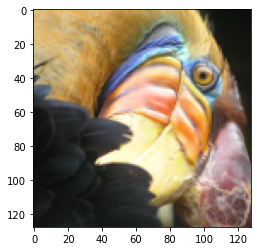

In [15]:
bird = plt.imread('data/bird_small.png')
bird = (bird * 255).astype(np.uint8)
print(bird.shape)
plt.imshow(bird)

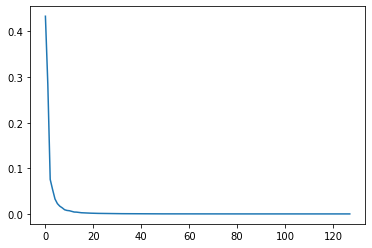

In [16]:
X = StandardScaler().fit_transform(bird[:,:,0])
bird_pca = MyPCA()
ratio, bird_trans = bird_pca.fit_transform(X, False)
plt.plot(range(X.shape[0]), ratio)
plt.show()

In [ ]:
change_dim(bird, "bird_small.gif")

![bird](bird_small.gif)